In [1]:
pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 72.2MB/s 
     |████████████████████████████████| 501kB 42.4MB/s 
     |████████████████████████████████| 3.1MB 38.4MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
pip install sklearn

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [4]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [0]:
x , y = mnist['data'] , mnist['target']


In [7]:
x.shape

(70000, 784)

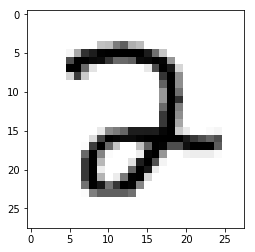

In [8]:
import matplotlib 
import matplotlib.pyplot as plt

digit = x[1800]
digit_image = digit.reshape(28,28)

plt.imshow(digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

# plt.axis("off")

In [9]:
y[1800]

'2'

In [0]:
# 60000:Training data
# 10000:Testing Data

x_train , x_test = x[:6000] , x[6000:7000]
y_train , y_test = y[:6000] , y[6000:7000]


In [0]:
# Shuffling the training data
import numpy as np
shuffle = np.random.permutation(6000)
x_train , y_train = x_train[shuffle] , y_train[shuffle]

In [0]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==8)
y_test_2 = (y_test==8)


In [14]:
y_train

array([0, 0, 7, ..., 7, 1, 4], dtype=int8)

In [0]:
from sklearn .linear_model import LogisticRegression


In [16]:
clf = LogisticRegression(tol=0.1)
clf.fit(x_train,y_train_2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [17]:
clf.predict([digit])

array([False])

In [18]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring = "accuracy")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
a.mean()

0.9488329913332478